Energy Price Prediction using Machine learning.
Author: Ronit Kumar
        RA2111032010009
        SRM Institute of Science & Technology, Kattankulathur

In [95]:
#importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as MinMaxScaler

In [96]:
#Loading datasets.
energy_set = pd.read_csv('energy_dataset.csv')
weather_set = pd.read_csv('weather_features.csv')

In [97]:
energy_set.columns = energy_set.columns.str.replace(' ','_').str.replace('-','_')
energy_set.head()

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal_derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [98]:
weather_set.columns = weather_set.columns.str.replace(' ','_').str.replace('-','_')
weather_set.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [99]:
#Checking for null values in energy dataset.
print("Null % in 'Energy-Dataset' are as follows: ")
(energy_set.isnull().sum()/len(energy_set))*100


Null % in 'Energy-Dataset' are as follows: 


time                                             0.000000
generation_biomass                               0.054187
generation_fossil_brown_coal/lignite             0.051335
generation_fossil_coal_derived_gas               0.051335
generation_fossil_gas                            0.051335
generation_fossil_hard_coal                      0.051335
generation_fossil_oil                            0.054187
generation_fossil_oil_shale                      0.051335
generation_fossil_peat                           0.051335
generation_geothermal                            0.051335
generation_hydro_pumped_storage_aggregated     100.000000
generation_hydro_pumped_storage_consumption      0.054187
generation_hydro_run_of_river_and_poundage       0.054187
generation_hydro_water_reservoir                 0.051335
generation_marine                                0.054187
generation_nuclear                               0.048483
generation_other                                 0.051335
generation_oth

In [100]:
#Checking for null values in weather dataset.
print("Null % in 'Weather-Dataset' are as follows: ")
(weather_set.isnull().sum()/len(weather_set))*100

Null % in 'Weather-Dataset' are as follows: 


dt_iso                 0.0
city_name              0.0
temp                   0.0
temp_min               0.0
temp_max               0.0
pressure               0.0
humidity               0.0
wind_speed             0.0
wind_deg               0.0
rain_1h                0.0
rain_3h                0.0
snow_3h                0.0
clouds_all             0.0
weather_id             0.0
weather_main           0.0
weather_description    0.0
weather_icon           0.0
dtype: float64

In [101]:
#Descriptive analysis of energy dataset for statistical analysis.
energy_set.describe()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal_derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [102]:
#Descriptive analysis of weather dataset for statistical analysis.
weather_set.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [103]:
#Data types of energy_set.
energy_set.dtypes

time                                            object
generation_biomass                             float64
generation_fossil_brown_coal/lignite           float64
generation_fossil_coal_derived_gas             float64
generation_fossil_gas                          float64
generation_fossil_hard_coal                    float64
generation_fossil_oil                          float64
generation_fossil_oil_shale                    float64
generation_fossil_peat                         float64
generation_geothermal                          float64
generation_hydro_pumped_storage_aggregated     float64
generation_hydro_pumped_storage_consumption    float64
generation_hydro_run_of_river_and_poundage     float64
generation_hydro_water_reservoir               float64
generation_marine                              float64
generation_nuclear                             float64
generation_other                               float64
generation_other_renewable                     float64
generation

In [104]:
#Handling time colum.
energy_set.index = pd.to_datetime(energy_set.index, utc=True)
energy_set.set_index('time', inplace=True)
#removing Nan or 0 filled Columns.
zero_val_cols = ['generation_marine',
                 'generation_geothermal',
                 'generation_fossil_peat',
                 'generation_wind_offshore',
                 'generation_fossil_oil_shale',
                 'forecast_wind_offshore_eday_ahead',
                 'generation_fossil_coal_derived_gas',
                 'generation_hydro_pumped_storage_aggregated']
energy_set.drop(columns=zero_val_cols, axis=1, inplace=True)

In [105]:
energy_set.corr()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
generation_biomass,1.000000,0.229809,-0.021660,0.433522,0.459530,-0.044898,-0.284877,-0.033675,-0.021279,0.658488,-0.560588,-0.004687,-0.346343,-0.068658,-0.008713,-0.072368,0.085216,0.083288,0.108945,0.142369
generation_fossil_brown_coal/lignite,0.229809,1.000000,0.499808,0.768710,0.314869,-0.323771,-0.525005,-0.229455,-0.008440,0.097600,0.104552,0.040447,0.282810,-0.434118,0.042306,-0.436031,0.278503,0.280461,0.567905,0.364088
generation_fossil_gas,-0.021660,0.499808,1.000000,0.541635,0.309623,-0.420646,-0.271527,0.060173,-0.112904,-0.066279,0.334880,0.074716,0.275053,-0.397298,0.080171,-0.397303,0.543711,0.548913,0.640895,0.461706
generation_fossil_hard_coal,0.433522,0.768710,0.541635,1.000000,0.440837,-0.406116,-0.497940,-0.157677,-0.023930,0.264383,-0.019426,0.046185,0.170235,-0.441853,0.047356,-0.444490,0.394291,0.396564,0.671596,0.465641
generation_fossil_oil,0.459530,0.314869,0.309623,0.440837,1.000000,-0.331011,-0.106753,0.160465,0.015619,0.375046,-0.115087,0.100211,-0.175741,-0.051787,0.096435,-0.058244,0.498637,0.497089,0.292793,0.284679
generation_hydro_pumped_storage_consumption,-0.044898,-0.323771,-0.420646,-0.406116,-0.331011,1.000000,0.053163,-0.234341,0.013081,0.021508,-0.267440,-0.214647,-0.188101,0.389054,-0.222105,0.390454,-0.559756,-0.562809,-0.600460,-0.426417
generation_hydro_run_of_river_and_poundage,-0.284877,-0.525005,-0.271527,-0.497940,-0.106753,0.053163,1.000000,0.652769,-0.124045,-0.127340,0.053435,0.039602,-0.286101,0.223157,0.045067,0.226416,0.120569,0.118570,-0.294718,-0.137106
generation_hydro_water_reservoir,-0.033675,-0.229455,0.060173,-0.157677,0.160465,-0.234341,0.652769,1.000000,-0.049558,0.065099,-0.065737,0.091834,-0.288259,-0.019231,0.103074,-0.011545,0.476570,0.479481,-0.017807,0.071549
generation_nuclear,-0.021279,-0.008440,-0.112904,-0.023930,0.015619,0.013081,-0.124045,-0.049558,1.000000,0.041155,-0.062524,0.004388,0.086623,0.049166,-0.000334,0.045548,0.089981,0.085664,-0.044189,-0.052596
generation_other,0.658488,0.097600,-0.066279,0.264383,0.375046,0.021508,-0.127340,0.065099,0.041155,1.000000,-0.443731,-0.016562,-0.360592,0.047718,-0.019154,0.044923,0.101312,0.100690,0.043599,0.100048


In [106]:
#Data types of weather_set.
weather_set.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [118]:
# #Checking for outliers in energy dataset using Box Plot.
# fig, axs = plt.subplots(nrows=20, ncols=1, dpi = 91, figsize=(25,100))
# i=0
# for col in energy_set.columns:
#     axs[i].boxplot(energy_set[col], vert = False)
#     axs[i].set_ylabel(col)
#     i+=1
# plt.show()

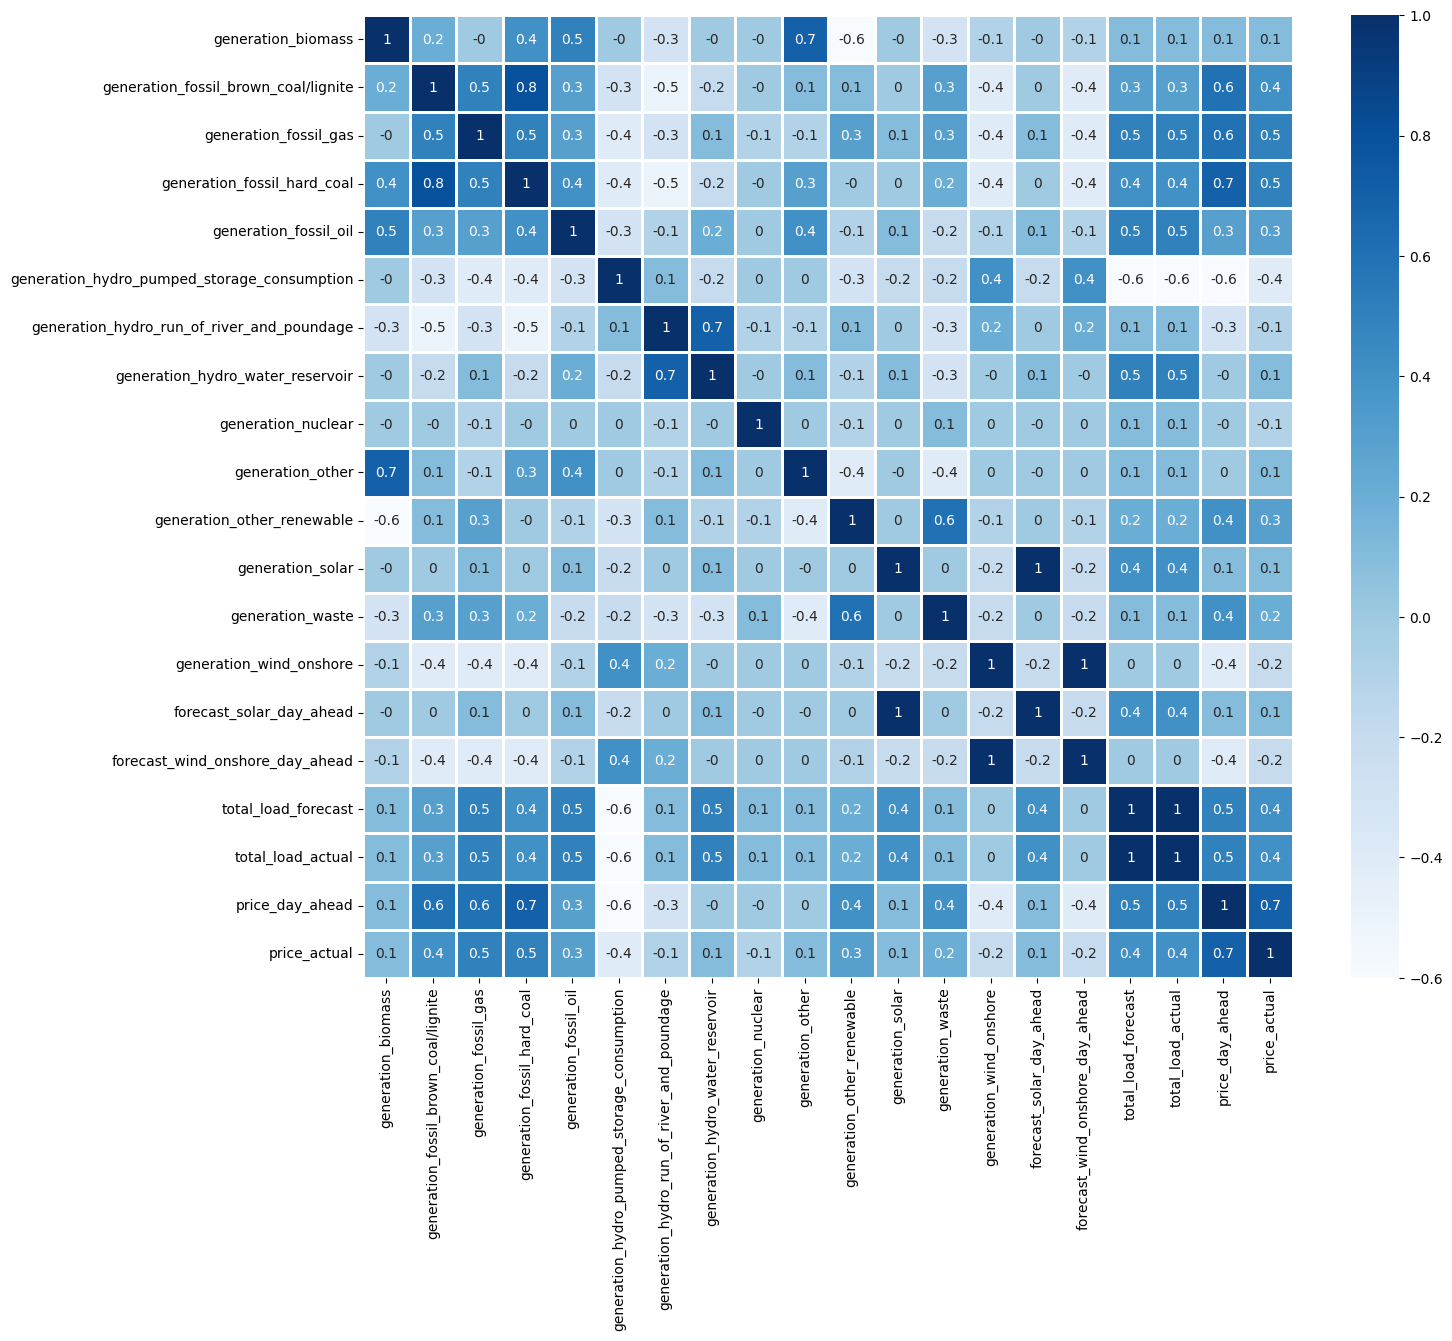

In [115]:
#Correlation heatmap.
plt.figure(figsize=(15,12.5))
sns.heatmap(round(energy_set.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show();

/Users/huloiarnata/Desktop/Energy_Price_prediction/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/huloiarnata/Desktop/Energy_Price_prediction/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


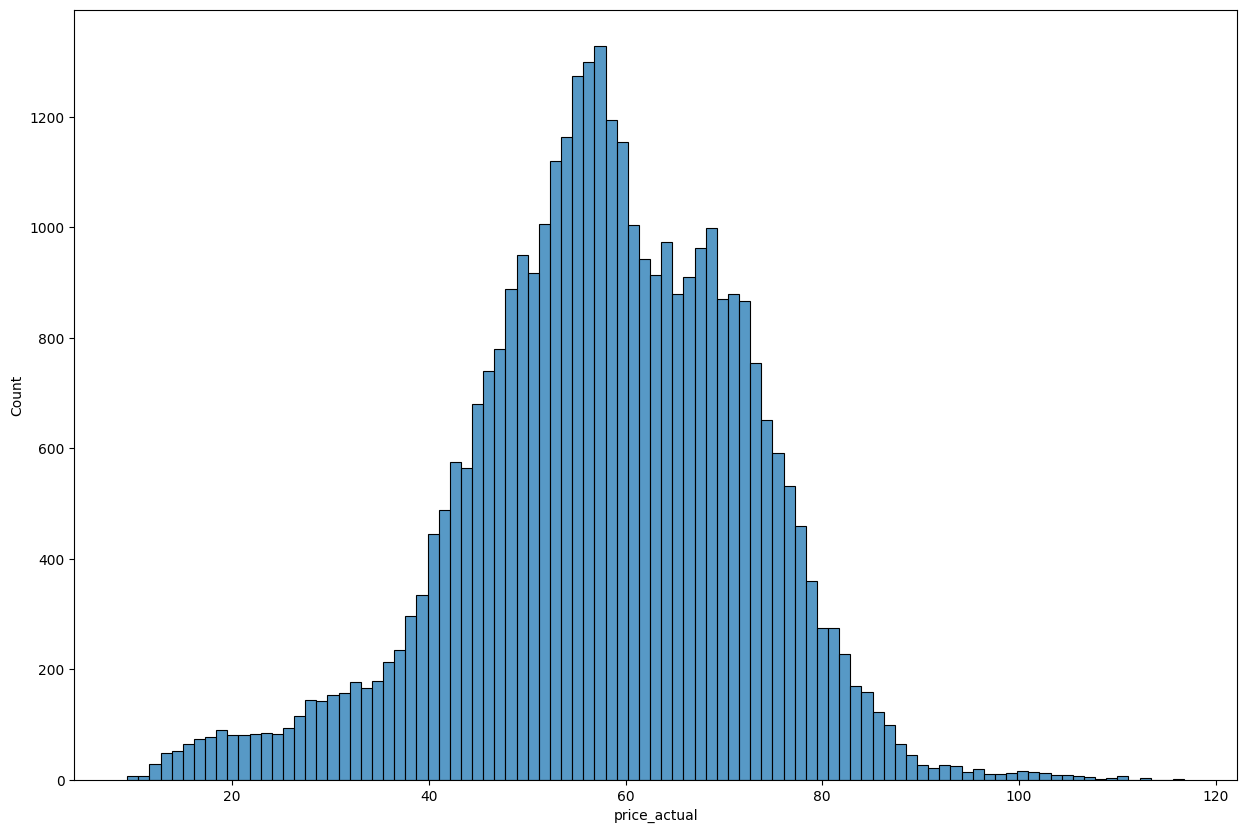

In [117]:
# Figure Size
plt.figure(figsize=(15,10))

# Hist graph to show distribution of target variable
sns.histplot(energy_set,x='price_actual');